In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 41.3 MB/s 
     |████████████████████████████████| 895 kB 43.9 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
     |████████████████████████████████| 6.6 MB 35.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import transformers
import numpy as np

In [ ]:
# path_data_origin = '/content/no_original_concat.txt'
# path_data_tortured = '/content/yes_concat.txt'
# data_origin = pd.read_csv(path_data_origin, sep='\t', header=None)
# data_origin.columns = ['status','none','para']
# data_origin
# data_tortured = pd.read_csv(path_data_tortured, sep='\t', header=None)
# data_tortured.columns = ['status','index_id','para','tortured_phrases','expected_phrases']
# data_tortured

path = '/content/5grams_sentence_yes.txt'
data = pd.read_csv(path,sep='\t')
data

sentence label  \
0      accessible common property, vitality utilization,   yes   
1       common property, vitality utilization, squander,   yes   
2         property, vitality utilization, squander, land   yes   
3        vitality utilization, squander, land distribute   yes   
4                         Quality of air, water quality,    no   
...                                                  ...   ...   
38392                    mistake in million responses in    no   
38393                       in million responses in high    no   
38394                million responses in high constancy    no   
38395              responses in high constancy mammalian    no   
38396           in high constancy mammalian polymerases.    no   

            torturedPhrases expectedPhrases  
0      vitality utilization      energy use  
1      vitality utilization      energy use  
2      vitality utilization      energy use  
3      vitality utilization      energy use  
4                       NaN             NaN  
...                     ...             ...  
38392                   NaN             NaN  
38393                   NaN             NaN  
38394                   NaN             NaN  
38395                   NaN             NaN  
38396                   NaN             NaN  

[38397 rows x 4 columns]

In [ ]:
# # concatenating df1 and df2 along rows
# data = pd.concat([data_origin, data_tortured], axis=0)
# shuffle the DataFrame rows
data = data.sample(frac = 1)
data = data[['sentence','label']]
# replace label by number
data['label']=data['label'].replace(to_replace="yes",value=1)
data['label']=data['label'].replace(to_replace="no",value=0)
set(data['label'])
data

sentence  label
22379                  a variational rule with the      0
26478          deplorable, as he considered Spooky      0
4138                              , it ought to in      0
31614         singing and discovered her execution      0
36739                       in general be the most      0
...                                            ...    ...
36531  serene relations with different individuals      0
5735    hypothetical sign to commotion proportions      1
35136             laparoscopy would be superior to      0
2594                       of generally on a side,      0
169            downstream locations in the ventral      0

[38397 rows x 2 columns]

0    33373
1     5024
Name: label, dtype: int64


Text(0.5, 1.0, 'Distribution of Labels')

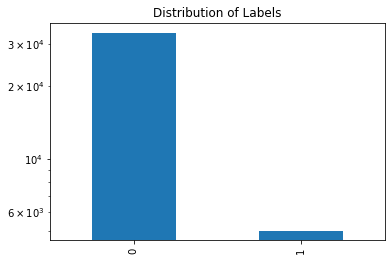

In [ ]:
import matplotlib.pyplot as plt
print(data['label'].value_counts())
data['label'].value_counts().plot.bar()
plt.yscale('log');
plt.title('Distribution of Labels')

New dataset 

In [ ]:
data

sentence  label
22379                  a variational rule with the      0
26478          deplorable, as he considered Spooky      0
4138                              , it ought to in      0
31614         singing and discovered her execution      0
36739                       in general be the most      0
...                                            ...    ...
36531  serene relations with different individuals      0
5735    hypothetical sign to commotion proportions      1
35136             laparoscopy would be superior to      0
2594                       of generally on a side,      0
169            downstream locations in the ventral      0

[38397 rows x 2 columns]

In [ ]:
# data for the training and testing
x_train, x_test, y_train, y_test = train_test_split(data['sentence'], data['label'], test_size=0.33, random_state=42)
x_train = list(x_train)
x_test = list(x_test)
y_train = list(y_train)
y_test = list(y_test)



In [ ]:
x_train[1]

'spite of the fact that'

In [ ]:
## TOKENISATION

from transformers import DistilBertTokenizer, AutoTokenizer

MAX_LEN = 20

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', padding=True, truncation=True)
# BASE_MODEL = "distilbert-base-multilingual-cased"
# tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
# tokenizer_out = tokenizer("Hello, my dog is cute")
# tokenizer_out

# let's check out how the tokenizer works

# for n in range(len(x_train)):
for n in range(5):
    # tokenize forum post
    tokenizer_out = tokenizer(x_train[n])
    # convert numerical tokens to alphabetical tokens
    encoded_tok = tokenizer.convert_ids_to_tokens(tokenizer_out.input_ids)
    # decode tokens back to string
    decoded = tokenizer.decode(tokenizer_out.input_ids)
    print(tokenizer_out)
    print(encoded_tok, '\n')
    print(decoded, '\n')
    print('---------------- \n')


{'input_ids': [101, 2895, 2453, 2022, 14801, 2004, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'action', 'might', 'be', 'outlined', 'as', '[SEP]'] 

[CLS] action might be outlined as [SEP] 

---------------- 

{'input_ids': [101, 8741, 1997, 1996, 2755, 2008, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'spite', 'of', 'the', 'fact', 'that', '[SEP]'] 

[CLS] spite of the fact that [SEP] 

---------------- 

{'input_ids': [101, 2000, 2536, 7846, 2006, 1037, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'to', 'various', 'clients', 'on', 'a', '[SEP]'] 

[CLS] to various clients on a [SEP] 

---------------- 

{'input_ids': [101, 2004, 2009, 2089, 1010, 2023, 2097, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'as', 'it', 'may', ',', 'this', 'will', '[SEP]'] 

[CLS] as it may, this will [SEP] 

---------------- 

{'input_ids': [101, 1997, 4495, 2024, 6065, 2011, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'of', 'opportunity', 'a

In [ ]:

from torch.utils.data import Dataset, DataLoader

MAX_LEN = 50

class PostsDataset(Dataset):
    def __init__(self, posts, labels, tokenizer, max_len):
        # variables that are set when the class is instantiated
        self.posts = posts
        self.labels = labels
        
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.posts)

    def __getitem__(self, item):
        # select the post and its category
        post = str(self.posts[item])
        label = self.labels[item]
        # tokenize the post
        tokenizer_out = self.tokenizer(
            post,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
            )
        # return a dictionary with the output of the tokenizer and the label
        return  {
            'input_ids': tokenizer_out['input_ids'].flatten(),
            'attention_mask': tokenizer_out['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# instantiate two PostsDatasets
train_dataset = PostsDataset(x_train, y_train, tokenizer, MAX_LEN)
test_dataset = PostsDataset(x_test, y_test, tokenizer, MAX_LEN)


In [ ]:
train_dataset[1]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0]),
 'input_ids': tensor([ 101, 8741, 1997, 1996, 2755, 2008,  102,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0]),
 'label': tensor(0)}

In [ ]:
## MODEL

from transformers import DistilBertModel

PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'

distilbert = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

first_post = train_dataset[0]

hidden_state = distilbert(
    input_ids=first_post['input_ids'].unsqueeze(0), attention_mask=first_post['attention_mask'].unsqueeze(0)
    )

print(hidden_state[0].shape)

print(distilbert.config)


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([1, 50, 768])
DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.18.0",
  "vocab_size": 30522
}



/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:

from transformers import DistilBertPreTrainedModel, DistilBertConfig

PRE_TRAINED_MODEL_NAME = 'distilbert-base-uncased'

class DistilBertForPostClassification(DistilBertPreTrainedModel):
    def __init__(self, config, num_labels, freeze_encoder=False):
        # instantiate the parent class DistilBertPreTrainedModel
        super().__init__(config)
        # instantiate num. of classes
        self.num_labels = num_labels
        # instantiate and load a pretrained DistilBERT model as encoder
        self.encoder = DistilBertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        # freeze the encoder parameters if required (Q1)
        if freeze_encoder:
          for param in self.encoder.parameters():
              param.requires_grad = False
        # the classifier: a feed-forward layer attached to the encoder's head
        self.classifier = torch.nn.Linear(
            in_features=config.dim, out_features=self.num_labels, bias=True)
        # in_features = 768, out_features = 4

        # instantiate a dropout function for the classifier's input
        self.dropout = torch.nn.Dropout(p=0.1)

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
    ):
        # encode a batch of sequences with DistilBERT
        encoder_output = self.encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
        )
        # extract the hidden representations from the encoder output
        hidden_state = encoder_output[0]  # (bs, seq_len, dim)
        # only select the encoding corresponding to the first token
        # of each sequence in the batch (Q2)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        # apply dropout
        pooled_output = self.dropout(pooled_output)  # (bs, dim)
        # feed into the classifier
        logits = self.classifier(pooled_output)  # (bs, dim)

        outputs = (logits,) + encoder_output[1:]

        if labels is not None: # (Q3)
          # instantiate loss function
          # SOLUTION :
          loss_fct = torch.nn.CrossEntropyLoss()
          # calculate loss
          # SOLUTION :
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
          # aggregate outputs
          outputs = (loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions)

Train First Model:

In [ ]:
# instantiate model
model = DistilBertForPostClassification(
    config=distilbert.config, num_labels=len(set(data['label'])), freeze_encoder = True
    )

# print info about model's parameters
total_params = sum(p.numel() for p in model.parameters())
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
trainable_params = sum([np.prod(p.size()) for p in model_parameters])
trainable_params

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1538

In [ ]:
## TRAINING

from transformers import Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./results',
    logging_dir='./logs',
    logging_first_step=True,
    logging_steps=50,
    num_train_epochs=10,
    per_device_train_batch_size=8,
    learning_rate=5e-5,

)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    compute_metrics=compute_metrics
)

train_results = trainer.train()
test_results = trainer.predict(test_dataset=test_dataset)

print('Predictions: \n', test_results.predictions)
print('\nAccuracy: ', test_results.metrics['test_accuracy'])
print('Precision: ', test_results.metrics['test_precision'])
print('Recall: ', test_results.metrics['test_recall'])
print('F1: ', test_results.metrics['test_f1'])
# print(set(data['status']))

MODEL_PATH = './my_model'
trainer.save_model(MODEL_PATH)



/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 25725
  Num Epochs = 10
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 32160
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to No

Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_ma

Saving model checkpoint to ./my_model
Configuration saved in ./my_model/config.json


Predictions: 
 [[ 0.87595576 -1.6434413 ]
 [ 1.8447468  -2.4740846 ]
 [ 0.5026115  -1.0324063 ]
 ...
 [ 0.69657886 -1.2154937 ]
 [ 1.1674455  -1.8910196 ]
 [ 1.1506784  -1.8739845 ]]

Accuracy:  0.8727904040404041
Precision:  [0.87456252 0.65      ]
Recall:  [0.99682684 0.03958587]
F1:  [0.9317007  0.07462687]


Model weights saved in ./my_model/pytorch_model.bin


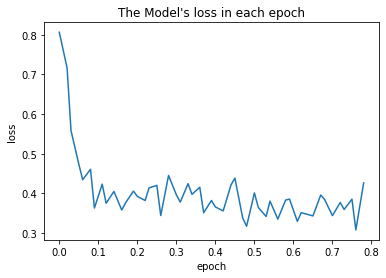

In [ ]:
import matplotlib.pyplot as plt
import json
# Opening JSON file
f = open('results/checkpoint-2500/trainer_state.json')
# returns JSON object as
# a dictionary
data = json.load(f)
# Iterating through the json
x = [i['epoch'] for i in data["log_history"]]
y = [i['loss'] for i in data["log_history"]]

plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(x, y)
plt.title("The Model's loss in each epoch")
# Closing file
f.close()